In [97]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import yfinance as yf
from pandas_datareader import data as pdr

from ta.volatility import BollingerBands
from create_prev_close_func import create_prev_close_df


### 1. Get the start date and end date to capture enough data for bband calculation

In [98]:
days_sub2 = datetime.timedelta(41)
days_sub1 = datetime.timedelta(1)
start_date = datetime.date.today() - days_sub2
end_date = datetime.date.today()-days_sub1
# end_date = datetime.date.today()

In [99]:
datetime.date.today()+datetime.timedelta(1)

datetime.date(2022, 5, 3)

### 2. Get the stock data to use the model for prediction

In [100]:
tick = 'NFLX'

yf.pdr_override()

df_raw = pdr.get_data_yahoo(tick, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


In [101]:
df_raw

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-21,378.019989,381.820007,368.940002,374.589996,374.589996,4866500
2022-03-22,371.140015,386.660004,366.760010,382.920013,382.920013,4242800
2022-03-23,379.769989,382.459991,374.489990,374.489990,374.489990,3729000
2022-03-24,379.760010,379.760010,368.899994,375.709991,375.709991,3888500
2022-03-25,377.070007,377.640015,366.429993,373.850006,373.850006,3574500
2022-03-28,375.230011,380.279999,366.730011,378.510010,378.510010,4323400
2022-03-29,384.390015,396.500000,380.329987,391.820007,391.820007,5880700
2022-03-30,389.549988,392.700012,378.630005,381.470001,381.470001,4023300
2022-03-31,383.589996,384.000000,373.609985,374.589996,374.589996,4134700


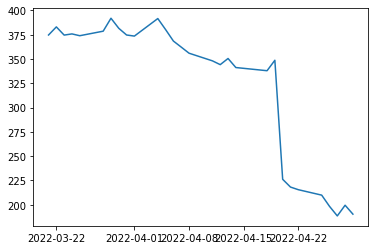

In [102]:
plt.plot(df_raw['Adj Close'])

In [103]:
df = df_raw.filter(['Adj Close'])
df

,Adj Close
Date,
2022-03-21,374.589996
2022-03-22,382.920013
2022-03-23,374.489990
2022-03-24,375.709991
2022-03-25,373.850006
2022-03-28,378.510010
2022-03-29,391.820007
2022-03-30,381.470001
2022-03-31,374.589996


### 3. Processing the data to form the required features to be used by the model

In [104]:
df_main = create_prev_close_df(df, "Adj Close")
df_main

,D_m3,D_m2,D_m1,Adj Close
Date,,,,
2022-03-21,NaN,NaN,NaN,374.589996
2022-03-22,NaN,NaN,374.589996,382.920013
2022-03-23,NaN,374.589996,382.920013,374.489990
2022-03-24,374.589996,382.920013,374.489990,375.709991
2022-03-25,382.920013,374.489990,375.709991,373.850006
2022-03-28,374.489990,375.709991,373.850006,378.510010
2022-03-29,375.709991,373.850006,378.510010,391.820007
2022-03-30,373.850006,378.510010,391.820007,381.470001
2022-03-31,378.510010,391.820007,381.470001,374.589996


In [105]:
#Calc Bollinger Band(Volatility)

bb_data = BollingerBands(df['Adj Close']).bollinger_wband()
df_bb = pd.DataFrame(bb_data)
df_bb

,bbiwband
Date,
2022-03-21,NaN
2022-03-22,NaN
2022-03-23,NaN
2022-03-24,NaN
2022-03-25,NaN
2022-03-28,NaN
2022-03-29,NaN
2022-03-30,NaN
2022-03-31,NaN


In [106]:
#Merging the lag price data with bband data
df_train = df_main.merge(df_bb, how = "left", left_index =  True, right_index=True)
df_train = df_train.dropna()
df_train = df_train.rename(columns = {'bbiwband':'bb'})
df_ft = df_train.reset_index()
df_ft

,Date,D_m3,D_m2,D_m1,Adj Close,bb
0,2022-04-18,344.100006,350.429993,341.130005,337.859985,17.398963
1,2022-04-19,350.429993,341.130005,337.859985,348.609985,17.966459
2,2022-04-20,341.130005,337.859985,348.609985,226.190002,38.360046
3,2022-04-21,337.859985,348.609985,226.190002,218.220001,52.224014
4,2022-04-22,348.609985,226.190002,218.220001,215.520004,63.064234
5,2022-04-25,226.190002,218.220001,215.520004,209.910004,72.636175
6,2022-04-26,218.220001,215.520004,209.910004,198.399994,81.911713
7,2022-04-27,215.520004,209.910004,198.399994,188.539993,90.264894
8,2022-04-28,209.910004,198.399994,188.539993,199.520004,96.326161
9,2022-04-29,198.399994,188.539993,199.520004,190.360001,102.536406


### 4. Transform by pct change

In [107]:
#pct change prices and bb
df_ft[['bb', 'D_m3', 'D_m2', 'D_m1','Adj Close']] = df_ft[['bb', 'D_m3', 'D_m2', 'D_m1', 'Adj Close']].pct_change()
df_ft = df_ft.dropna().reset_index(drop=True)
df_ft

,Date,D_m3,D_m2,D_m1,Adj Close,bb
0,2022-04-19,0.018396,-0.026539,-0.009586,0.031818,0.032617
1,2022-04-20,-0.026539,-0.009586,0.031818,-0.351166,1.135092
2,2022-04-21,-0.009586,0.031818,-0.351166,-0.035236,0.361417
3,2022-04-22,0.031818,-0.351166,-0.035236,-0.012373,0.207572
4,2022-04-25,-0.351166,-0.035236,-0.012373,-0.026030,0.151781
5,2022-04-26,-0.035236,-0.012373,-0.026030,-0.054833,0.127699
6,2022-04-27,-0.012373,-0.026030,-0.054833,-0.049698,0.101978
7,2022-04-28,-0.026030,-0.054833,-0.049698,0.058237,0.067150
8,2022-04-29,-0.054833,-0.049698,0.058237,-0.045910,0.064471


### 5. Forming the df for prediction using the last row data of D_m2, D_m1, Adj Close and bb_m1
- isolate the last D_m2, D_m1, Adj Close and bb data as features to predict the next day price
    - D_m2 becomes D_m3
    - D_m1 becomes D_m2
    - Adj Close becomes D_m1
    - bb becomes bb_m1
- this treatment will make it similar to the features used to train the model

In [108]:
df_pred = df_ft.iloc[-1,2:]
df_pred


D_m2        -0.049698
D_m1         0.058237
Adj Close    -0.04591
bb           0.064471
Name: 8, dtype: object

In [109]:
# To adjust series into required shape for LSTM model prediction
df_pred = pd.DataFrame(df_pred)
df_pred = df_pred.T.reset_index(drop=True)
df_pred = df_pred.rename(columns={'D_m2':'D_m3', 'D_m1': 'D_m2','Adj Close':'D_m1', 'bb':'bb_m1'})
df_pred = df_pred[['bb_m1','D_m3', 'D_m2', 'D_m1']]
df_pred = df_pred.astype(float)
df_pred

,bb_m1,D_m3,D_m2,D_m1
0,0.064471,-0.049698,0.058237,-0.04591


In [110]:
# load saved model and predicting the price
from keras.models import load_model
model = load_model('my_model.h5')
prediction = model.predict(df_pred)
prediction

array([[0.00104804]], dtype=float32)

In [111]:
#Retrieving the previous close price for pred price generation
pclose = df.iloc[-1,-1]
pclose 

199.52000427246094

In [112]:
pred_px = ((prediction[0]+1)*pclose)[-1]
print(f"The predicted price for {tick} on is {np.round(pred_px,decimals=2)}.")

The predicted price for NFLX on is 199.72999572753906.


In [113]:
type(pred_px)

numpy.float32

### 6. For Testing - if we have predicted day actual data
- check the RMSE for the predicted price and actual price
- check the pct deviation from the actual price

In [114]:
days_sub = datetime.timedelta(2)

start_date2 = datetime.date.today() - days_sub
end_date2 = datetime.date.today()

yf.pdr_override()

df_ft2 = pdr.get_data_yahoo(tick, start = start_date2, end = end_date2)

[*********************100%***********************]  1 of 1 completed


In [115]:
actual=df_ft2.iloc[-1,-2]
rmse = np.sqrt(np.mean(pred_px - df_ft2.iloc[-1,-2])**2)
pct_diff = abs((df_ft2.iloc[-1,-2]-pred_px)/df_ft2.iloc[-1,-2])*100
date = df_ft2.index[-1].strftime('%d-%m-%Y')

print(f"The predicted price for {tick} on {date} is {pred_px.round(2)}.")
print(f'The actual price of {tick} on {date} is {actual.round(2)}.')
print(f"The RMSE for actual vs predicted is {rmse.round(3)}")
print(f'The % deviation of the pred price from actual price is {pct_diff.round(2)}%.')

The predicted price for NFLX on 29-04-2022 is 199.72999572753906.
The actual price of NFLX on 29-04-2022 is 190.36.
The RMSE for actual vs predicted is 9.369
The % deviation of the pred price from actual price is 4.92%.


In [122]:
model.predict(np.array([-0.026539,-0.009586, 0.031818, 0.032617]).reshape(1,-1))


array([[-0.00177783]], dtype=float32)

In [123]:
348.609985*(1+(-0.00177783))

347.99021571036747